In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [5]:
from google.colab import files
files.upload()        #Importing files using files.upload

Saving FinalProject_5302.xlsx to FinalProject_5302 (1).xlsx


{'FinalProject_5302 (1).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xac\xf7\x86\x8cq\x01\x00\x00\xef\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [6]:
df = pd.read_excel('FinalProject_5302.xlsx')
print(df)   #Reading the xlsx as a pandas data frame
df.head()             #Printing the top entries of the data frame

          Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279620         65.0     1154  ...   
1             64     0.01               73.523580         62.0      492  ...   
2             66     0.01               73.219240         64.0      430  ...   
3             69     0.01               78.184220         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS        GDP  Population  \
0    6.0               8.16        65.0       0.1  584.25920  33736494.0   
1   58.0               8.18        62.0       0.1  612.69650    327582.0   
2   62.0               8.13        64.0       0.1  631.74500  31731688.0   
3   67.0               8.52        67.0       0.1  669.95900   3696958.0   
4   68.0               7.87        68.0       0.1   63.53723   2978599.0   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])
df.columns
df

Year  Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0     2015       1             65.0            263.0             62     0.01   
1     2014       1             59.9            271.0             64     0.01   
2     2013       1             59.9            268.0             66     0.01   
3     2012       1             59.5            272.0             69     0.01   
4     2011       1             59.2            275.0             71     0.01   
...    ...     ...              ...              ...            ...      ...   
2933  2004       1             44.3            723.0             27     4.36   
2934  2003       1             44.5            715.0             26     4.06   
2935  2002       1             44.8             73.0             25     4.43   
2936  2001       1             45.3            686.0             25     1.72   
2937  2000       1             46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0                  71.279620         65.0     1154  19.1  ...    6.0   
1                  73.523580         62.0      492  18.6  ...   58.0   
2                  73.219240         64.0      430  18.1  ...   62.0   
3                  78.184220         67.0     2787  17.6  ...   67.0   
4                   7.097109         68.0     3013  17.2  ...   68.0   
...                      ...          ...      ...   ...  ...    ...   
2933                0.000000         68.0       31  27.1  ...   67.0   
2934                0.000000          7.0      998  26.7  ...    7.0   
2935                0.000000         73.0      304  26.3  ...   73.0   
2936                0.000000         76.0      529  25.9  ...   76.0   
2937                0.000000         79.0     1483  25.5  ...   78.0   

      Total expenditure  Diphtheria  HIV/AIDS        GDP  Population  \
0                  8.16        65.0       0.1  584.25920  33736494.0   
1                  8.18        62.0       0.1  612.69650    327582.0   
2                  8.13        64.0       0.1  631.74500  31731688.0   
3                  8.52        67.0       0.1  669.95900   3696958.0   
4                  7.87        68.0       0.1   63.53723   2978599.0   
...                 ...         ...       ...        ...         ...   
2933               7.13        65.0      33.6  454.36670  12777511.0   
2934               6.52        68.0      36.7  453.35120  12633897.0   
2935               6.53        71.0      39.8   57.34834    125525.0   
2936               6.16        75.0      42.1  548.58730  12366165.0   
2937               7.10        78.0      43.5  547.35890  12222251.0   

      thinness 1-19 years  thinness 5-9 years  \
0                    17.2                17.3   
1                    17.5                17.5   
2                    17.7                17.7   
3                    17.9                18.0   
4                    18.2                18.2   
...                   ...                 ...   
2933                  9.4                 9.4   
2934                  9.8                 9.9   
2935                  1.2                 1.3   
2936                  1.6                 1.7   
2937                 11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 21 columns]

In [14]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [15]:
df.describe()

Year       Status  Life expectancy  Adult Mortality  \
count  2938.000000  2938.000000      2938.000000      2938.000000   
mean   2007.518720     0.825732        69.224932       164.796448   
std       4.613841     0.379405         9.507640       124.080302   
min    2000.000000     0.000000        36.300000         1.000000   
25%    2004.000000     1.000000        63.200000        74.000000   
50%    2008.000000     1.000000        72.000000       144.000000   
75%    2012.000000     1.000000        75.600000       227.000000   
max    2015.000000     1.000000        89.000000       723.000000   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2938.000000  2938.000000             2938.000000  2938.000000   
mean       30.303948     4.602861              738.251288    80.940461   
std       117.926501     3.916288             1987.914824    22.586855   
min         0.000000     0.010000                0.000000     1.000000   
25%         0.000000     1.092500                4.685342    80.940461   
50%         3.000000     4.160000               64.912905    87.000000   
75%        22.000000     7.390000              441.534125    96.000000   
max      1800.000000    17.870000            19479.910000    99.000000   

             Measles          BMI  ...        Polio  Total expenditure  \
count    2938.000000  2938.000000  ...  2938.000000        2938.000000   
mean     2419.592240    38.321247  ...    82.550188           5.938190   
std     11467.272489    19.927677  ...    23.352143           2.400274   
min         0.000000     1.000000  ...     3.000000           0.370000   
25%         0.000000    19.400000  ...    78.000000           4.370000   
50%        17.000000    43.000000  ...    93.000000           5.938190   
75%       360.250000    56.100000  ...    97.000000           7.330000   
max    212183.000000    87.300000  ...    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.324084     1.742103    7483.158519  1.275247e+07   
std      23.640073     5.077785   13136.800466  5.377359e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.487025  4.189172e+05   
50%      93.000000     0.100000    3116.561500  3.675929e+06   
75%      97.000000     0.800000    7483.158519  1.275247e+07   
max      99.000000    50.600000  119172.700000  1.290000e+09   

       thinness 1-19 years  thinness 5-9 years  \
count          2938.000000         2938.000000   
mean              4.839704            4.870317   
std               4.394535            4.482708   
min               0.100000            0.100000   
25%               1.600000            1.600000   
50%               3.400000            3.400000   
75%               7.100000            7.200000   
max              27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.627551    11.992793  
std                           0.204820     3.264381  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.662000    12.100000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000  

[8 rows x 21 columns]

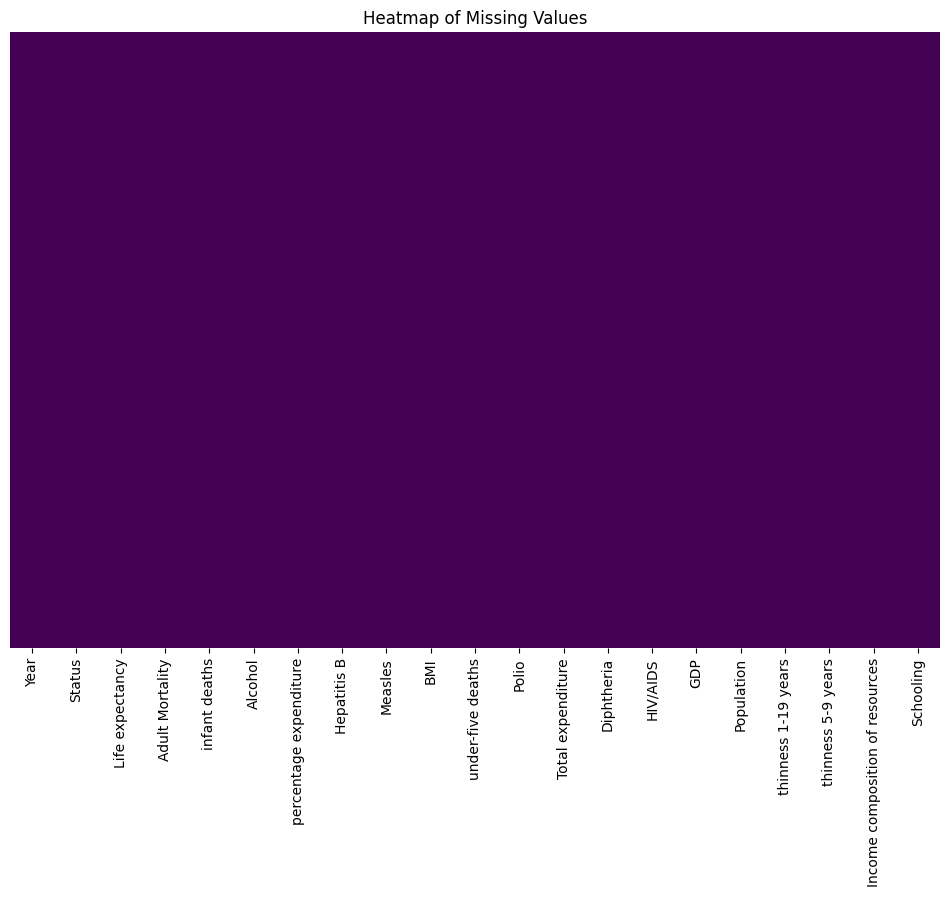

In [16]:
# Plot a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [17]:
#Mean imputation for all features

numeric_columns = df.select_dtypes(include=['number'])

# Perform mean imputation on numeric columns
df = numeric_columns.fillna(numeric_columns.mean())

# Combine with non-numeric columns
df = pd.concat([df, df.select_dtypes(exclude=['number'])], axis=1)
print(df.isnull().sum())

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


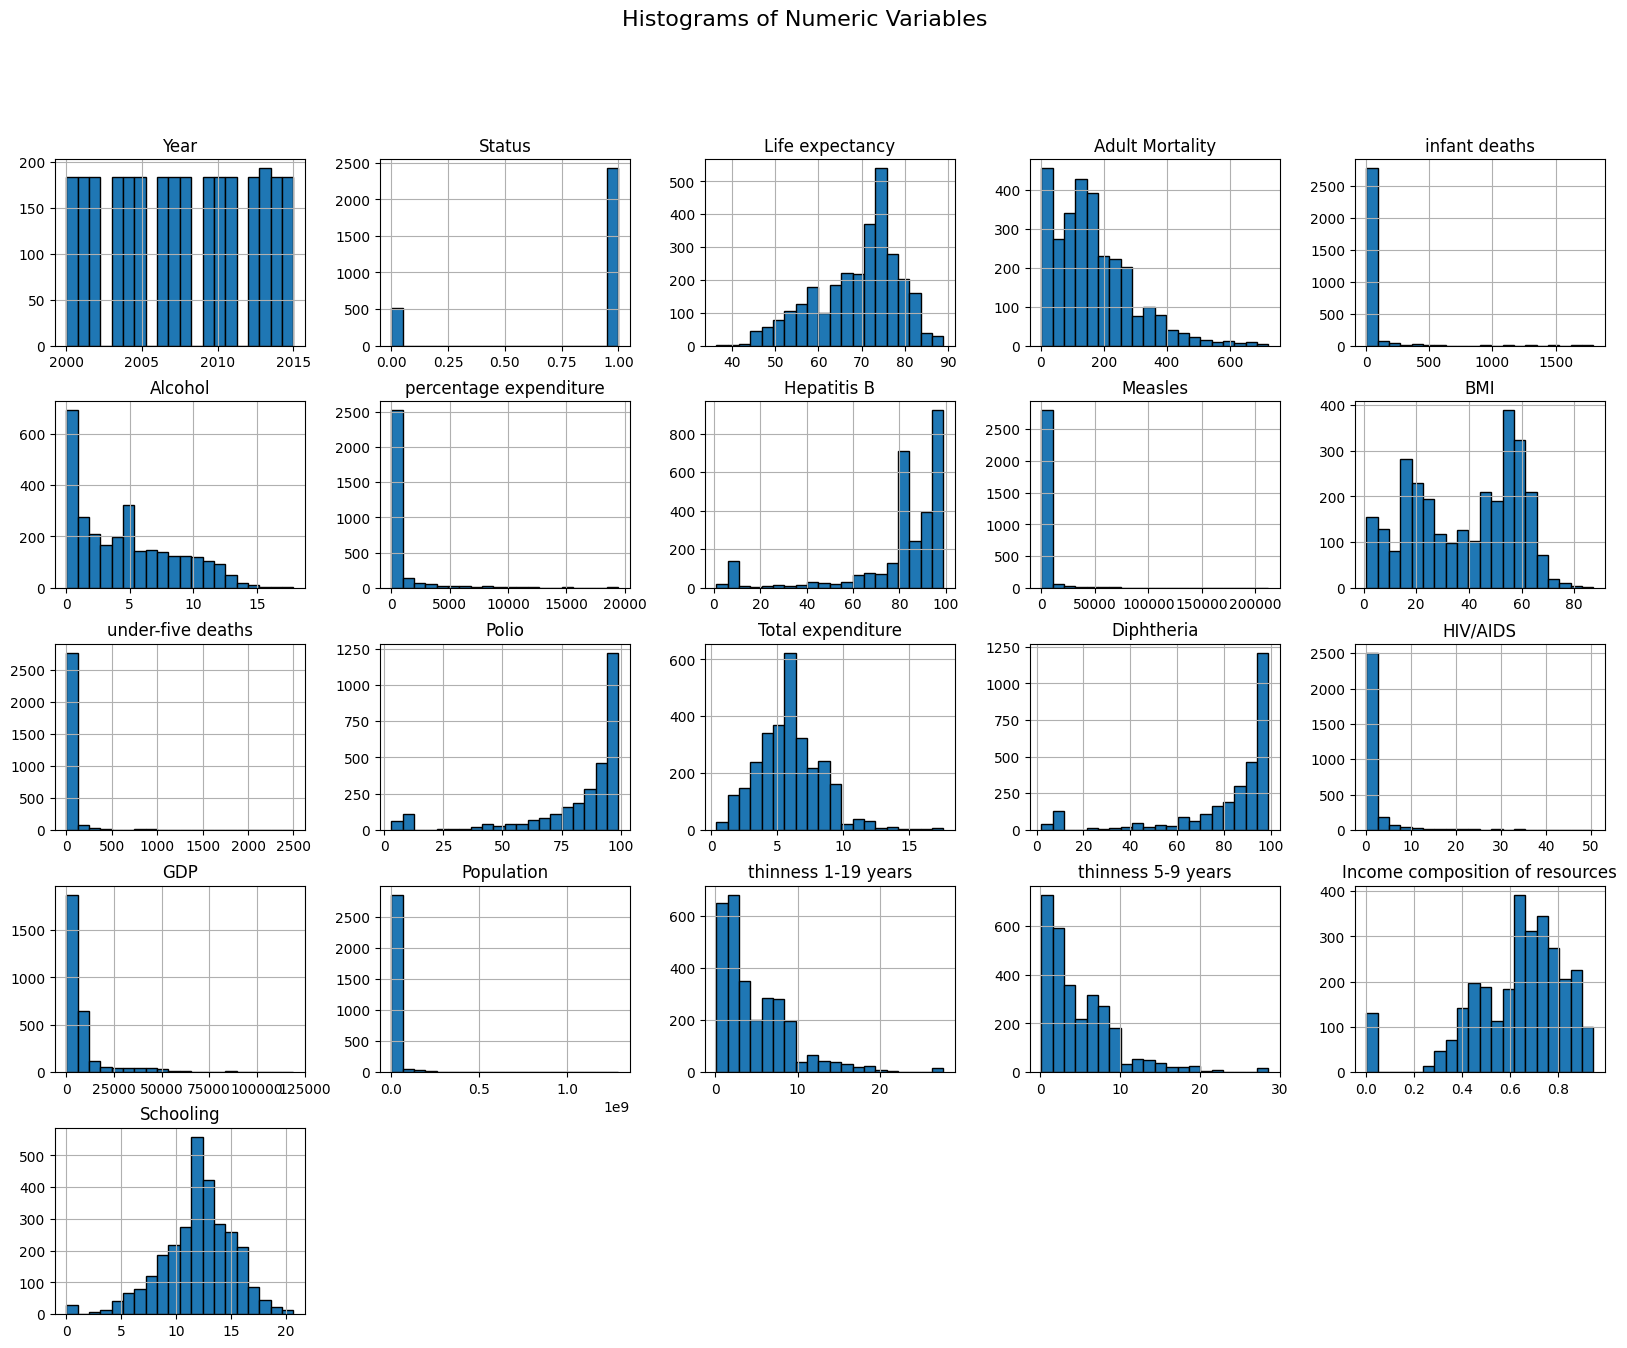

In [18]:
# Plot histograms for numeric columns after imputation
df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.show()

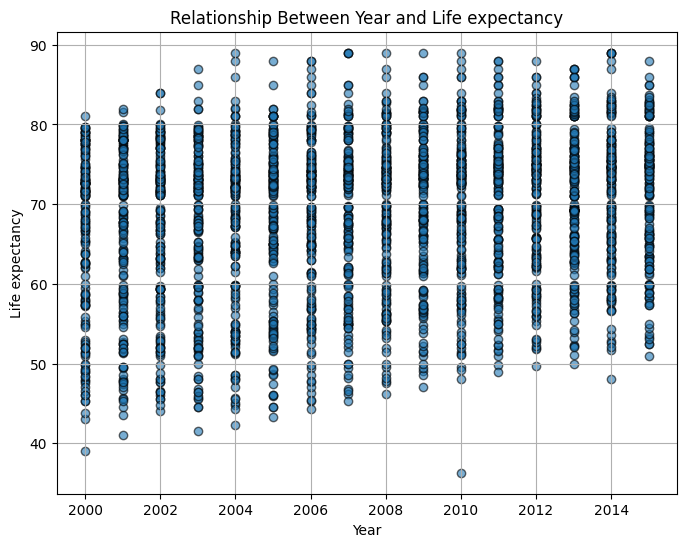

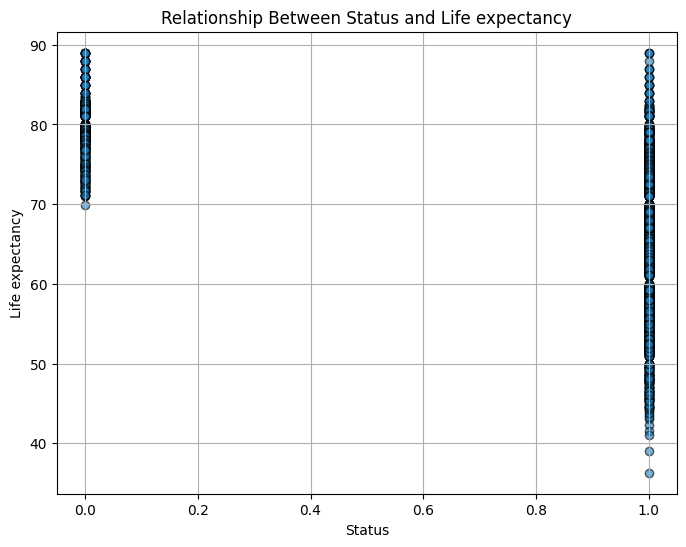

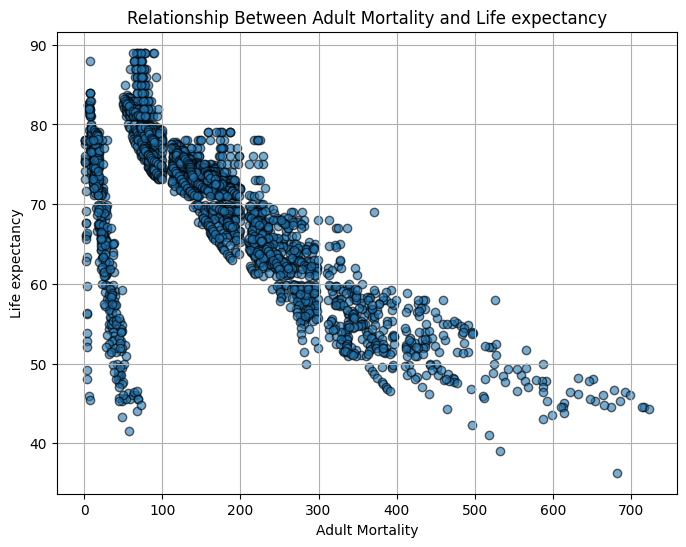

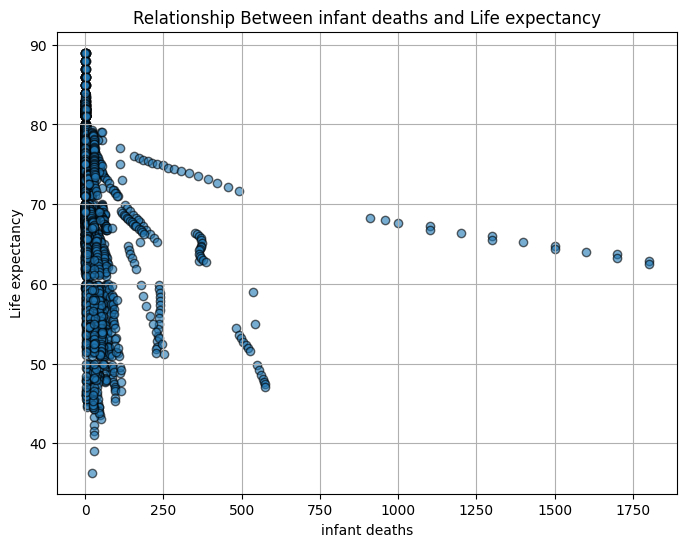

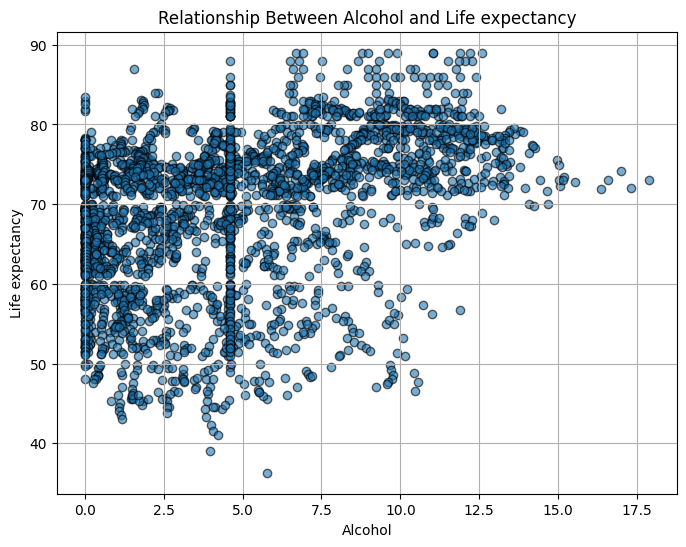

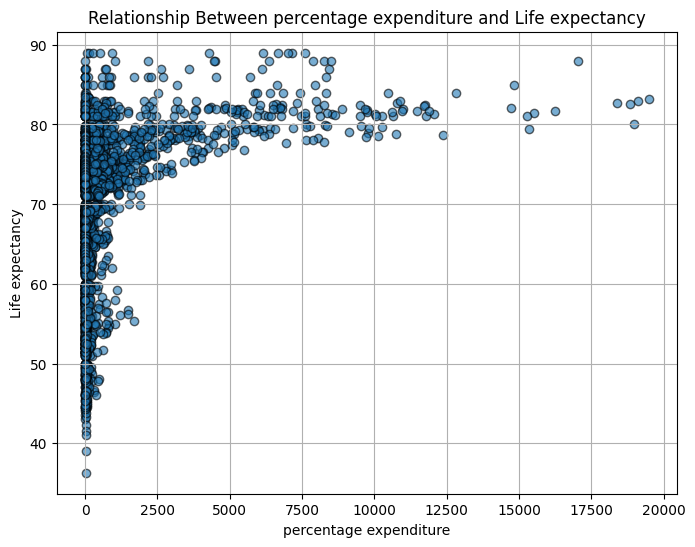

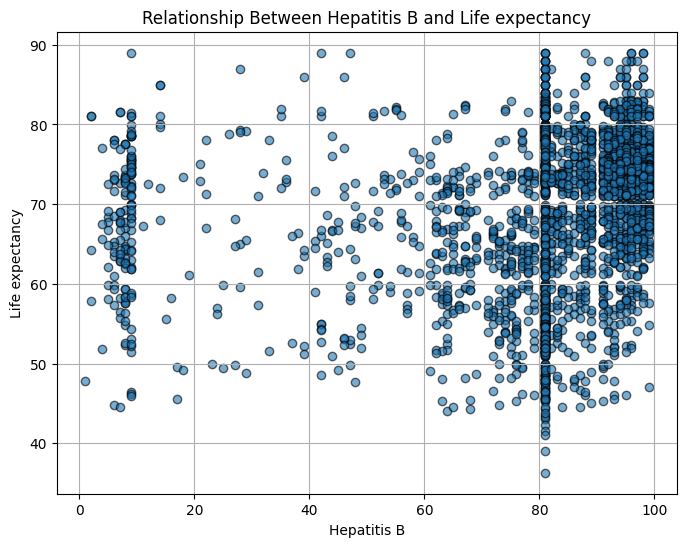

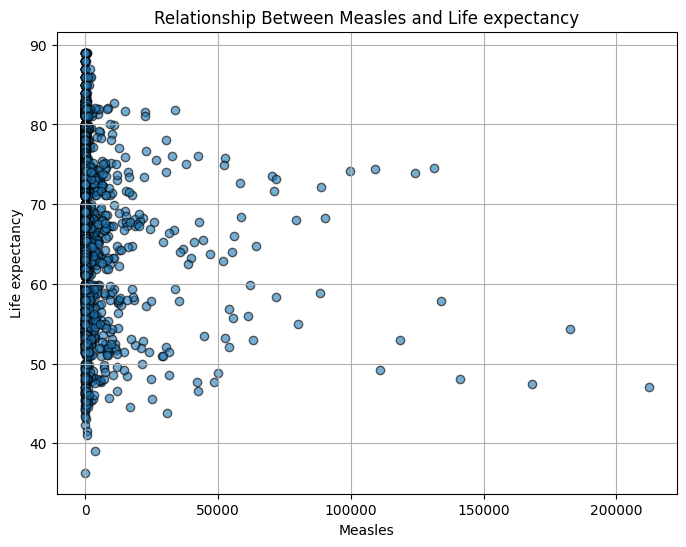

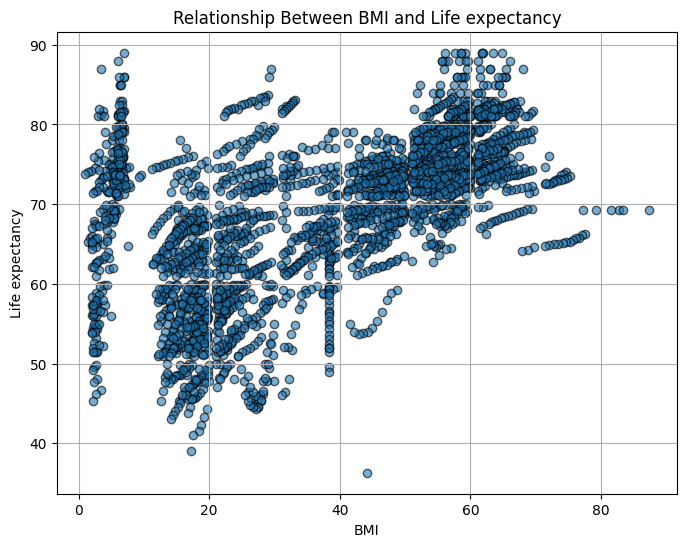

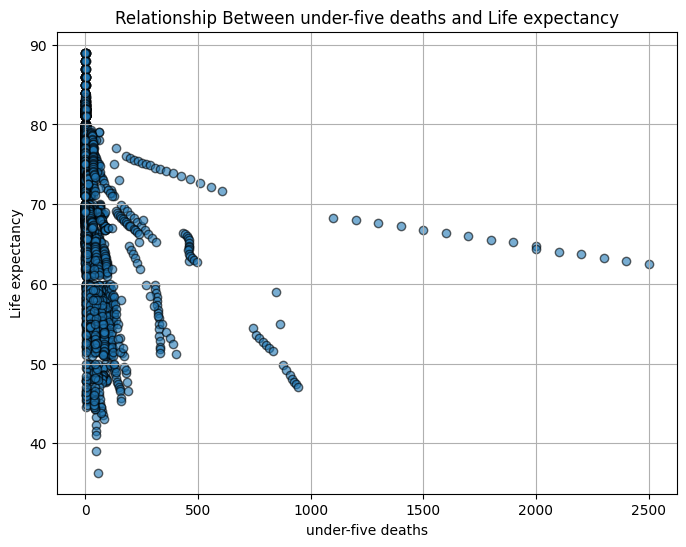

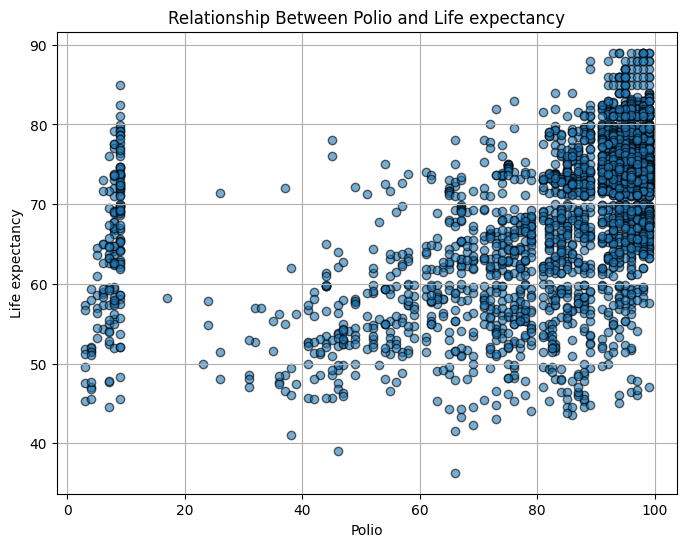

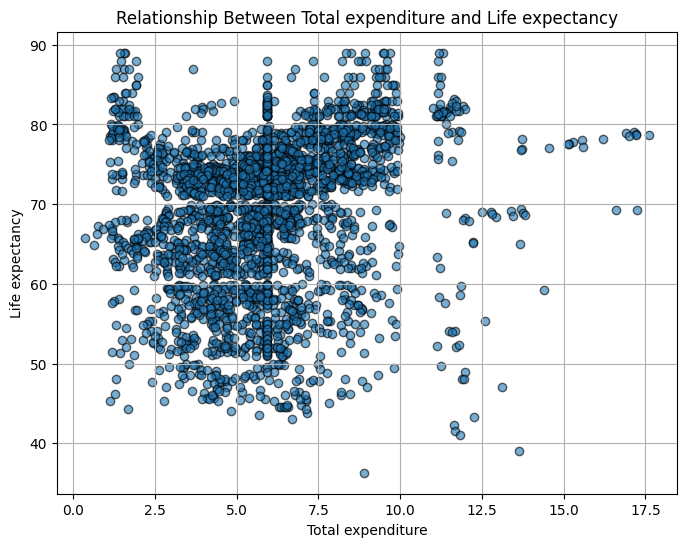

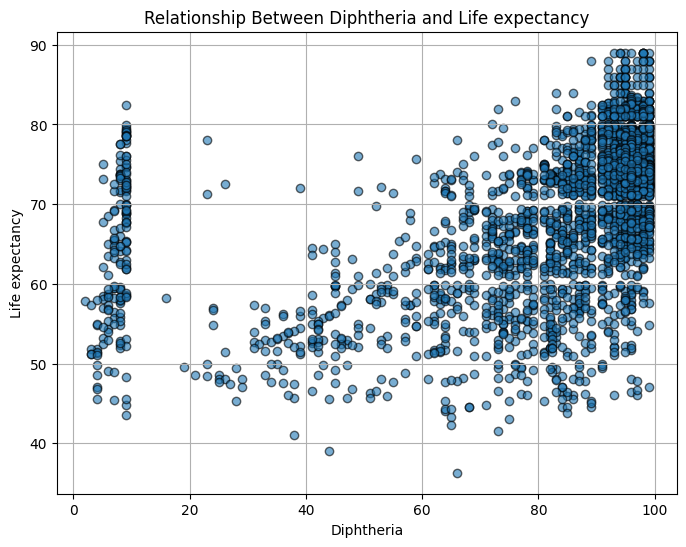

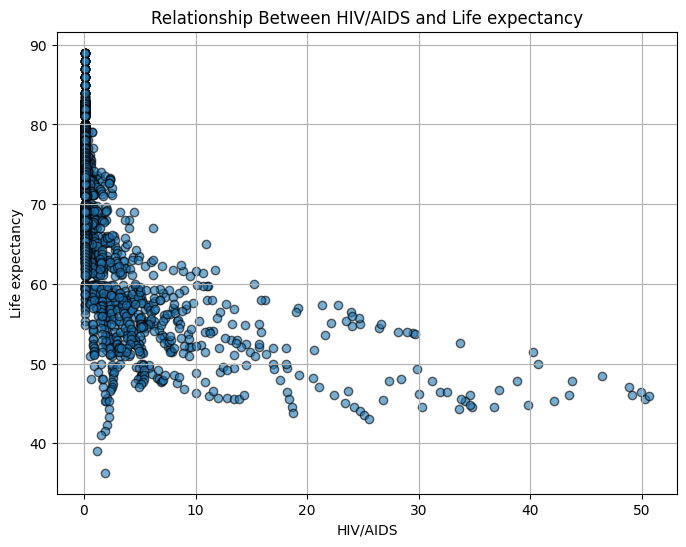

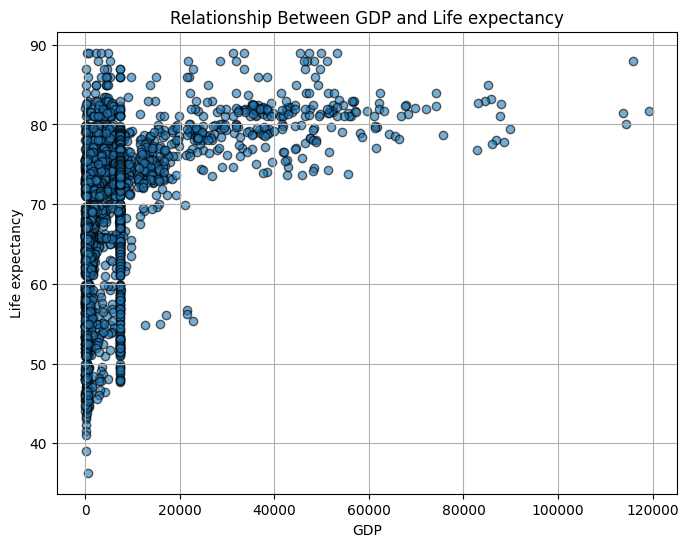

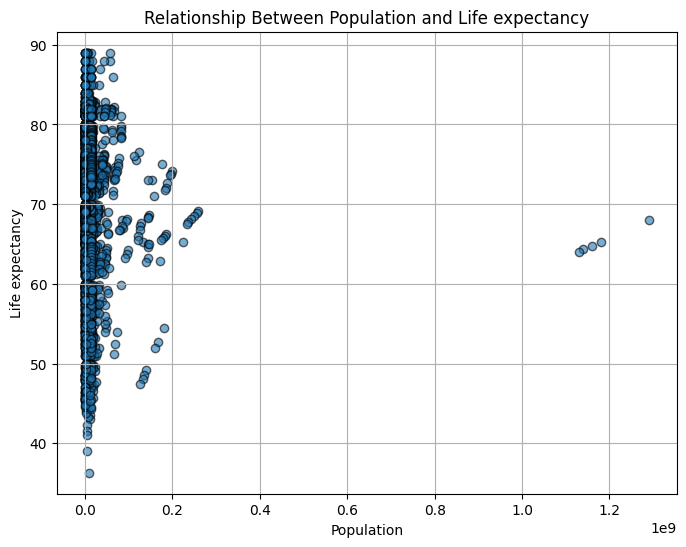

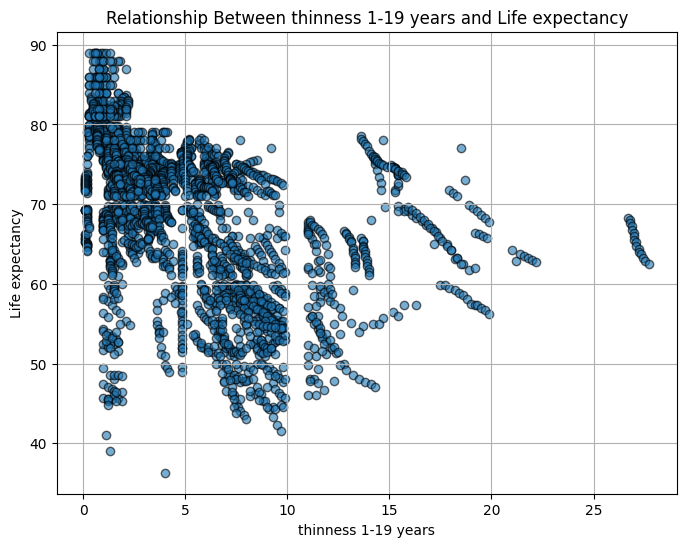

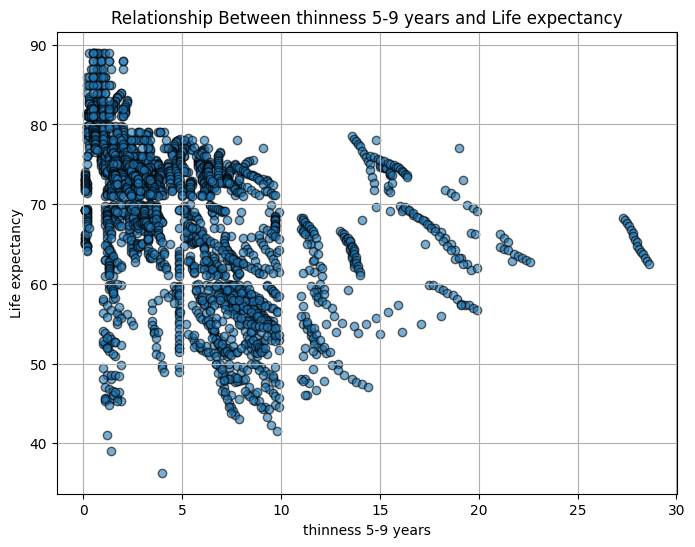

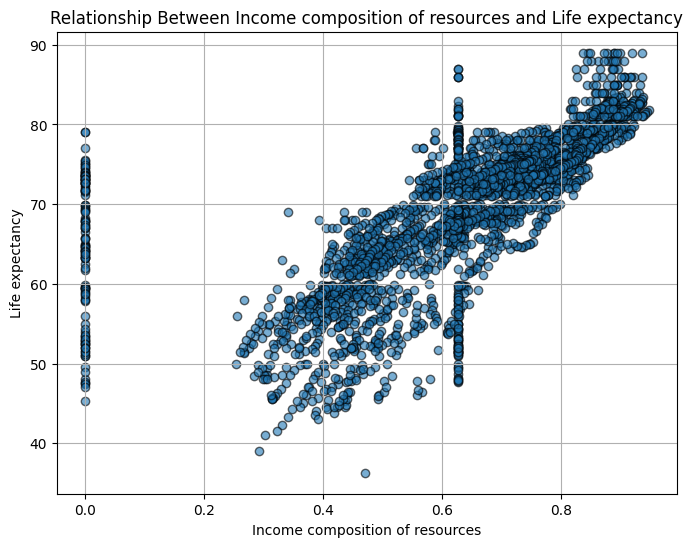

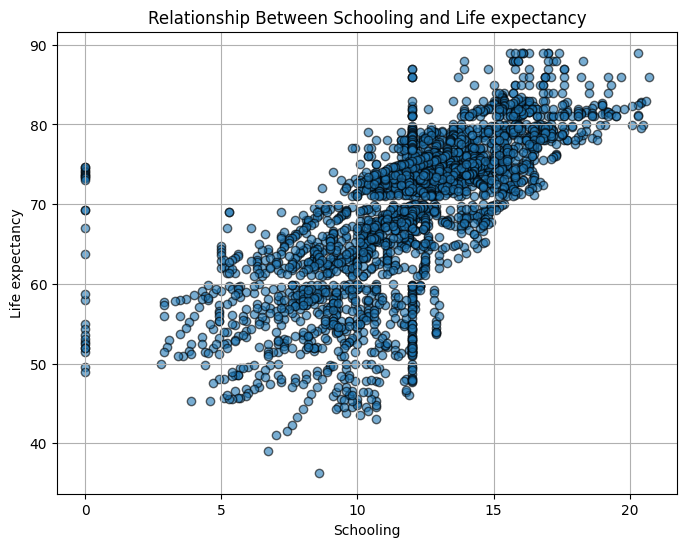

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



# Specify the target variable
target_variable = 'Life expectancy'  # Replace with your target column name

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate scatter plots for all numeric variables against the target variable
for column in numeric_columns:
    if column != target_variable:  # Skip the target variable itself
        plt.figure(figsize=(8, 6))
        plt.scatter(df[column], df[target_variable], alpha=0.6, edgecolors='k')
        plt.title(f'Relationship Between {column} and {target_variable}')
        plt.xlabel(column)  # Explicitly label the x-axis with the column name
        plt.ylabel(target_variable)  # Explicitly label the y-axis with the target variable name
        plt.grid(True)
        plt.show()


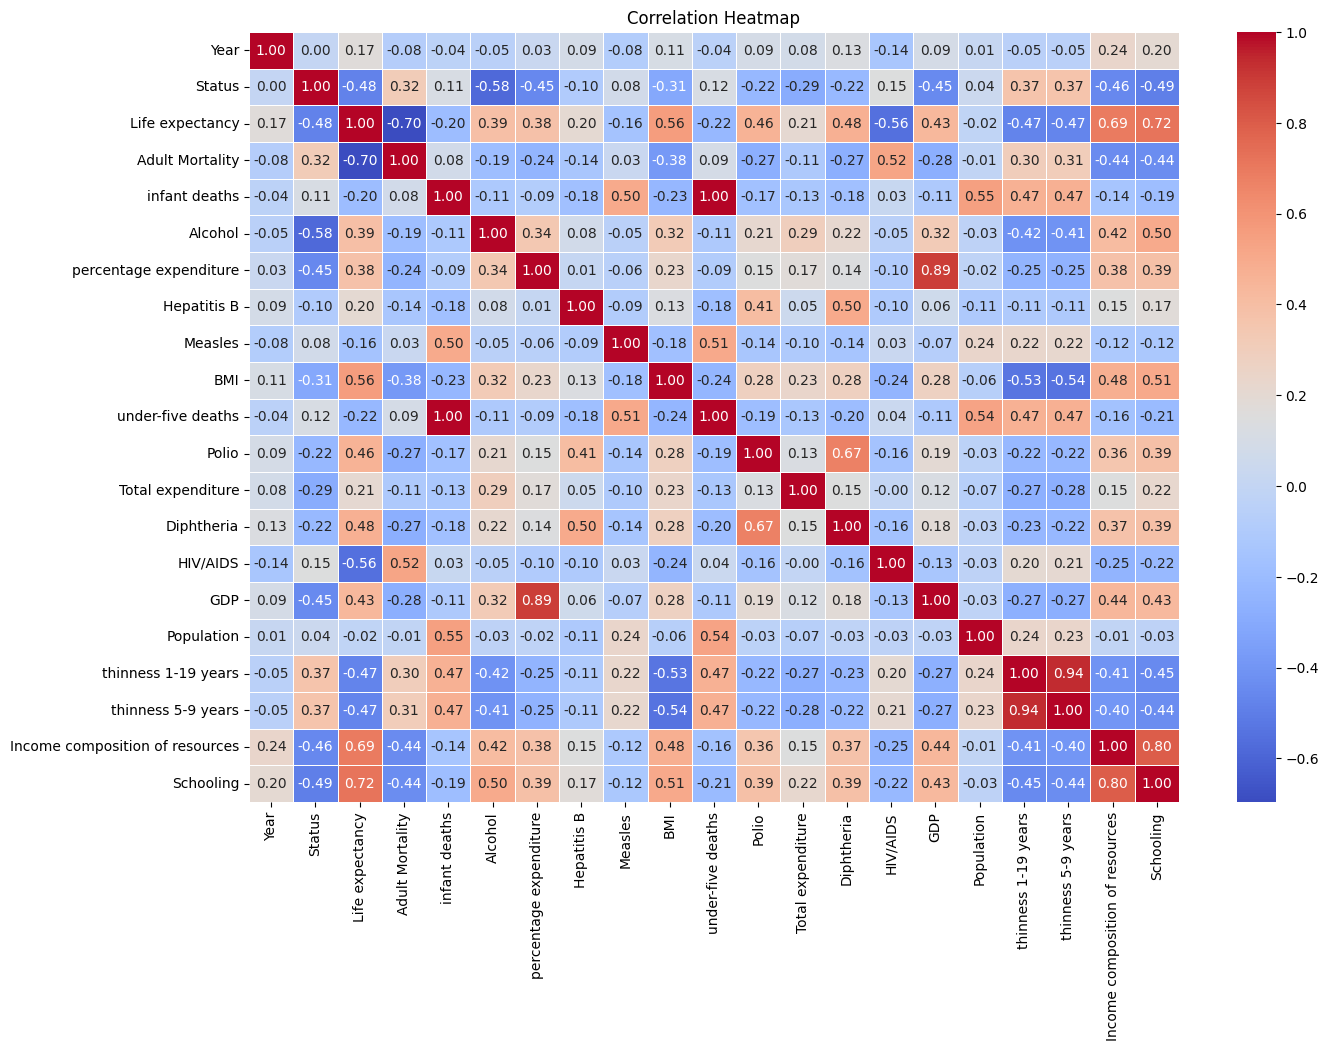

In [20]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

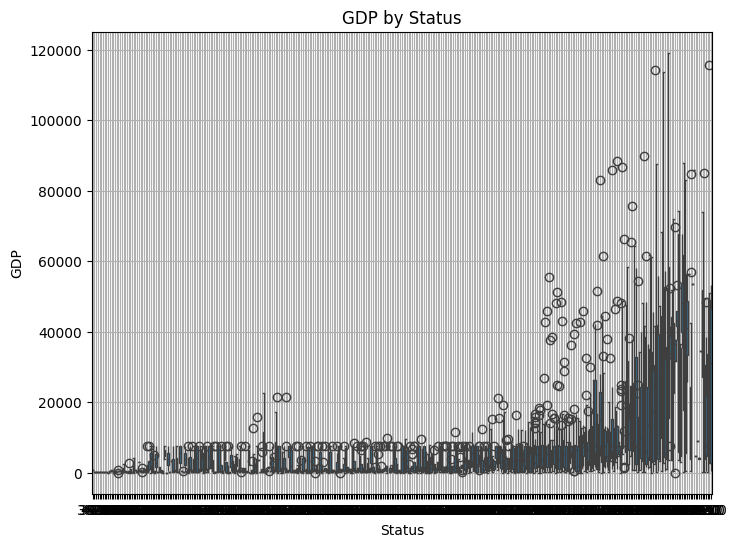

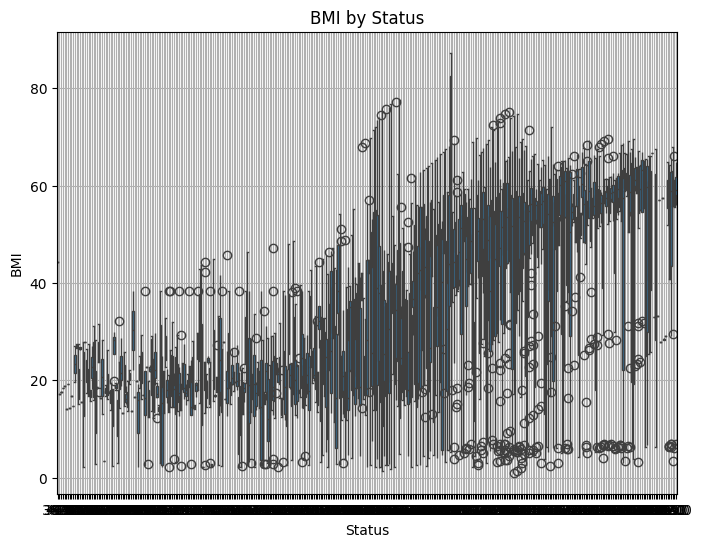

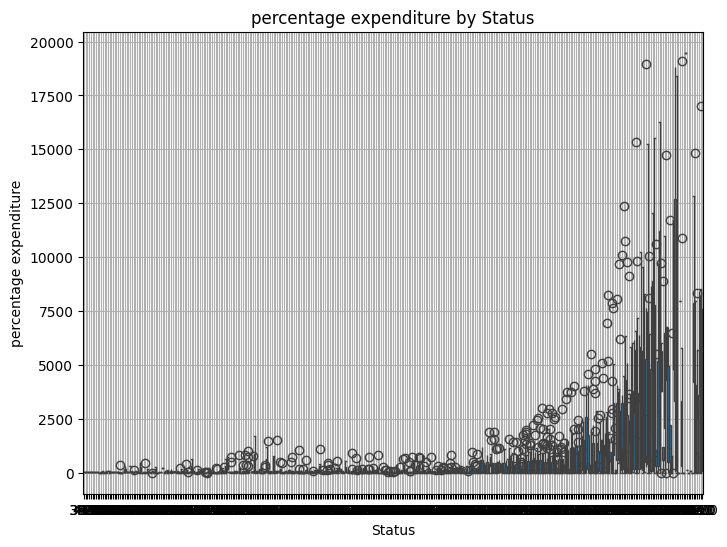

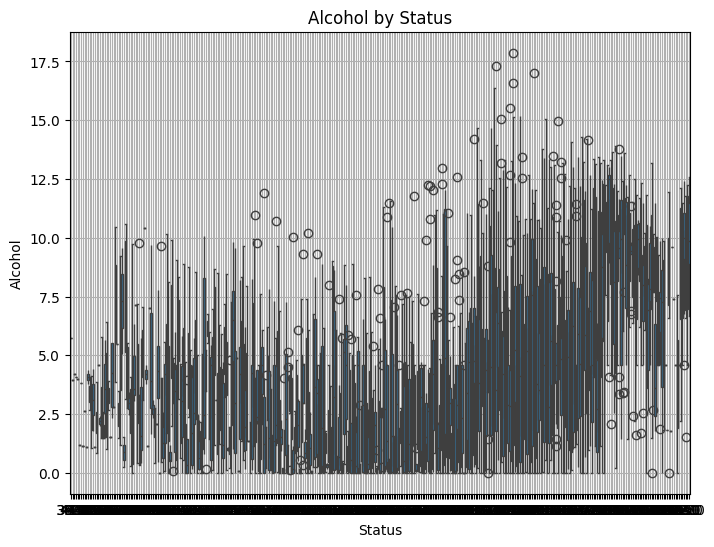

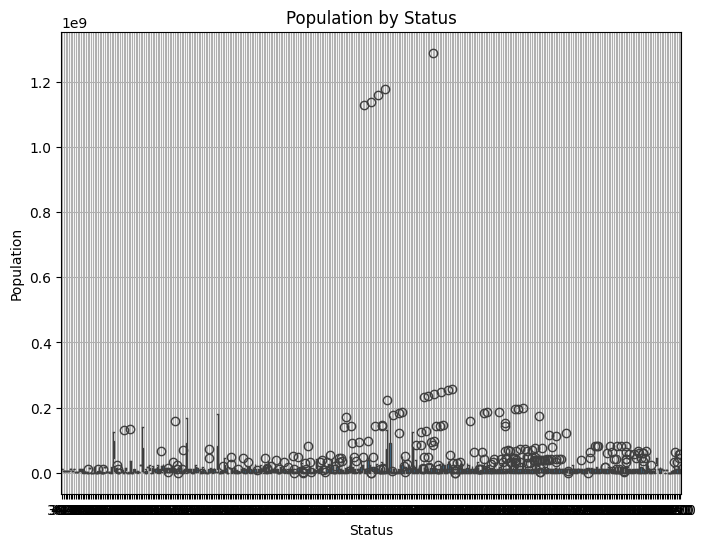

In [21]:
# List of continuous features to compare with Life Expectancy
continuous_features = ['GDP', 'BMI', 'percentage expenditure', 'Alcohol', 'Population']

# Box plots for each feature grouped by Status
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Life expectancy', y=feature, data=df)
    plt.title(f'{feature} by Status')
    plt.xlabel('Status')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

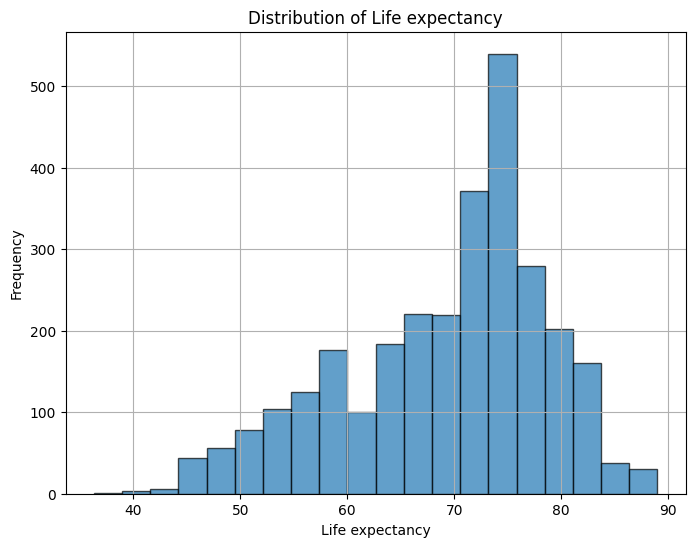

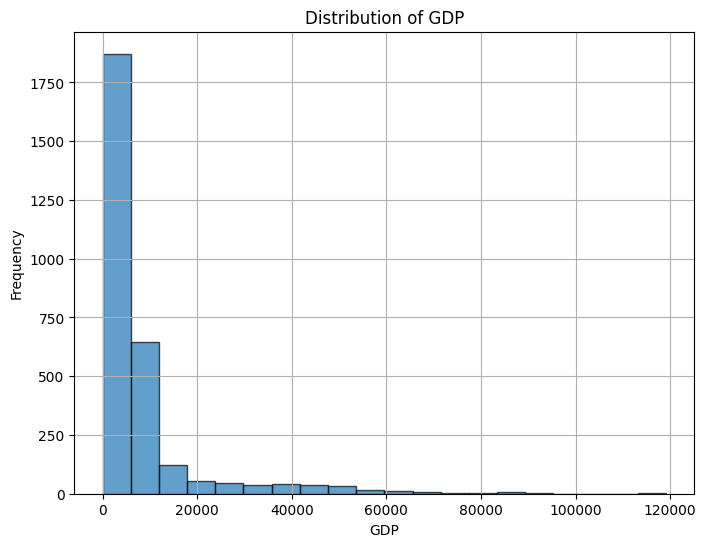

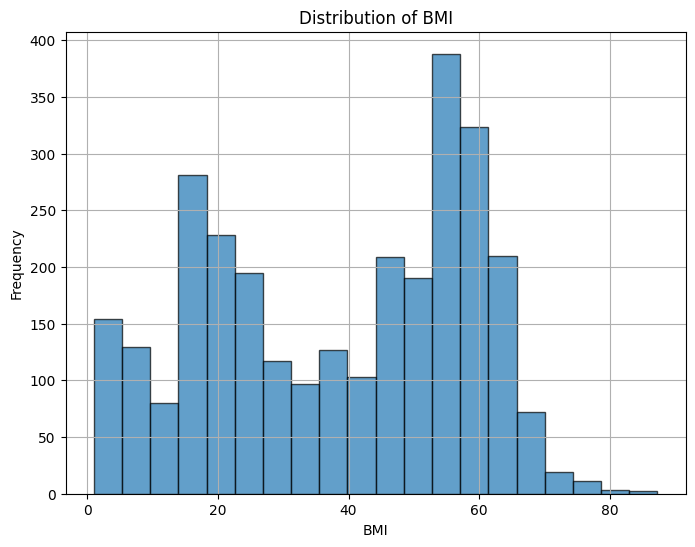

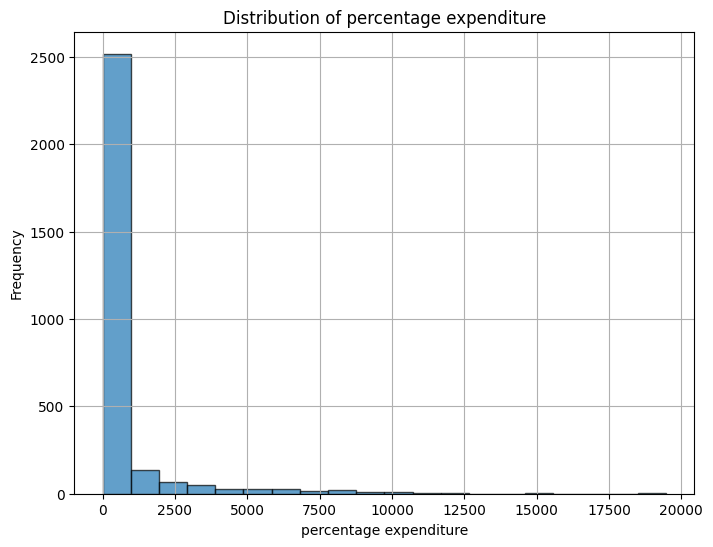

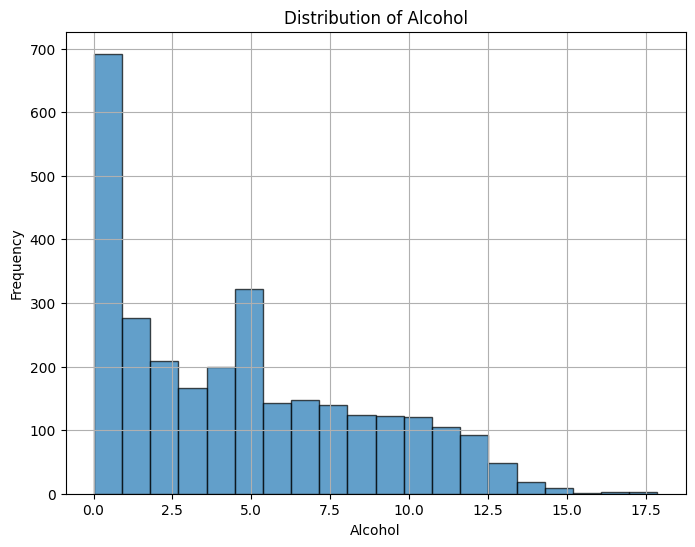

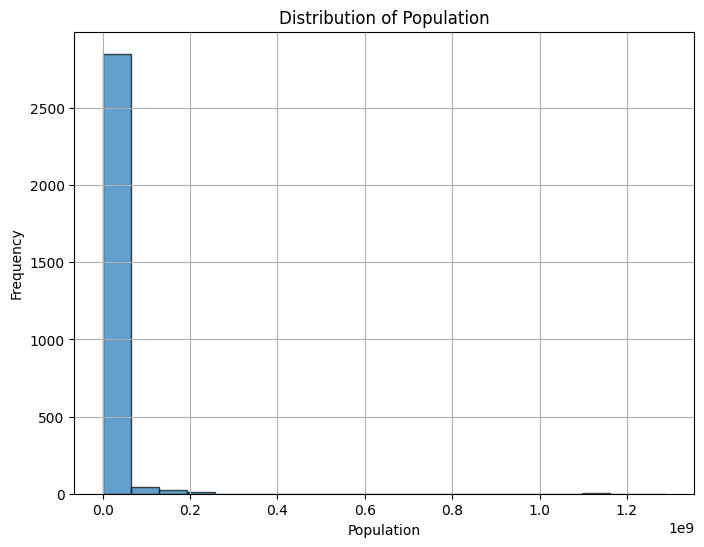

In [22]:
# List of variables to plot histograms
hist_features = ['Life expectancy', 'GDP', 'BMI', 'percentage expenditure', 'Alcohol', 'Population']

# Histograms for each feature
for feature in hist_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature].dropna(), bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

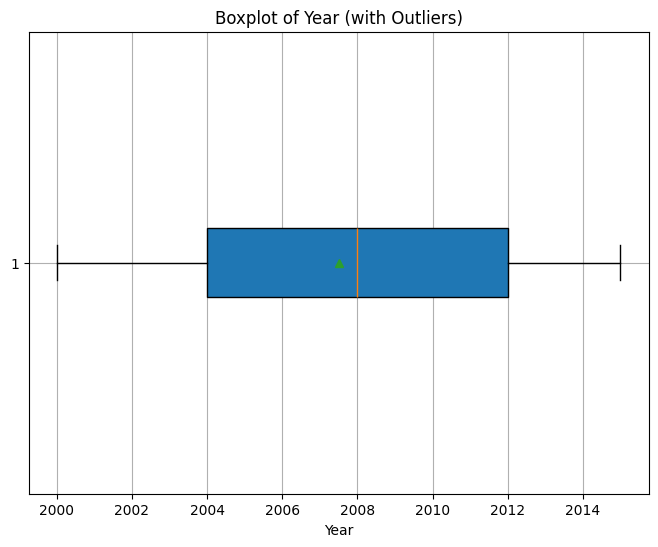

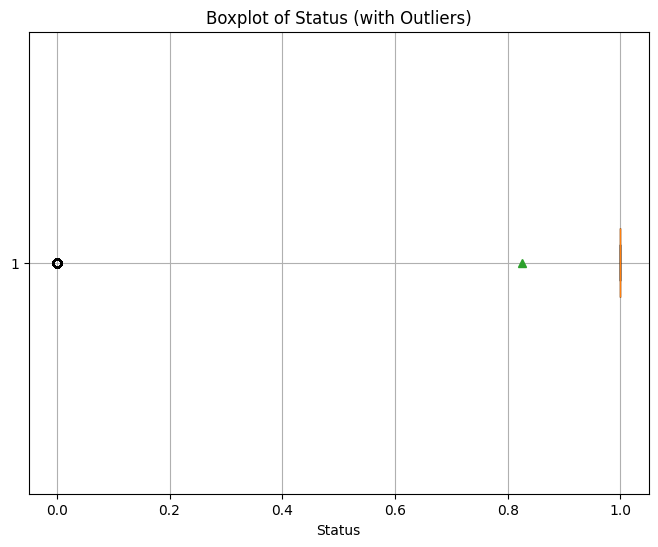

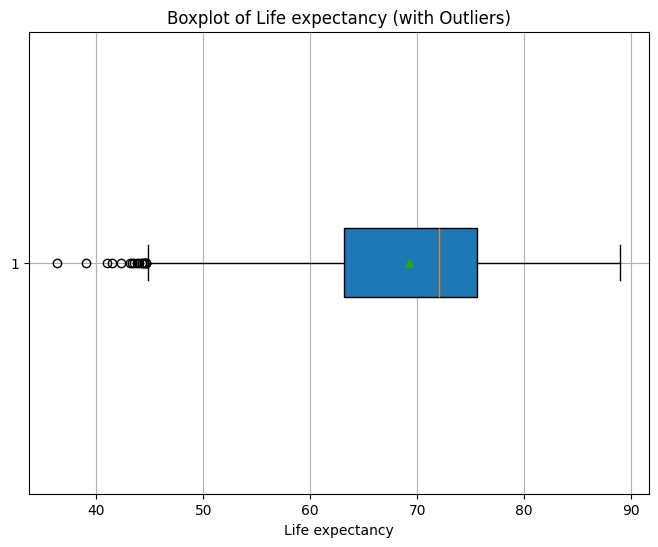

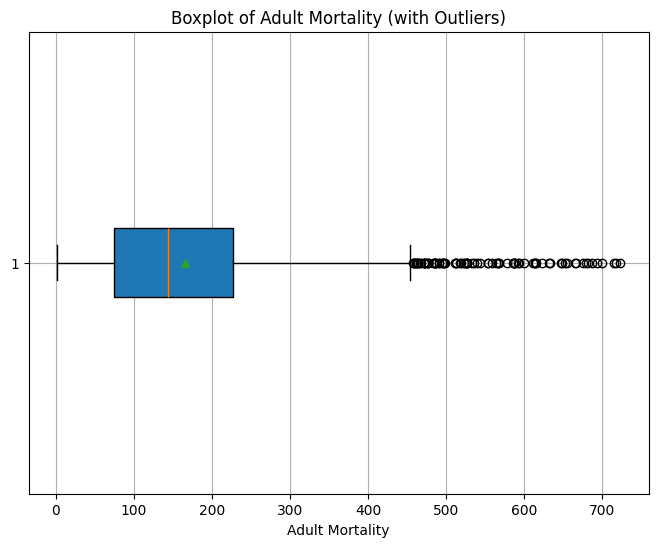

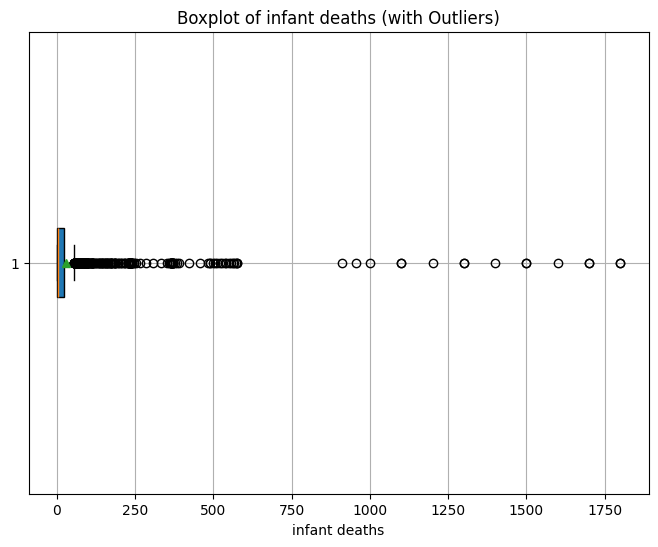

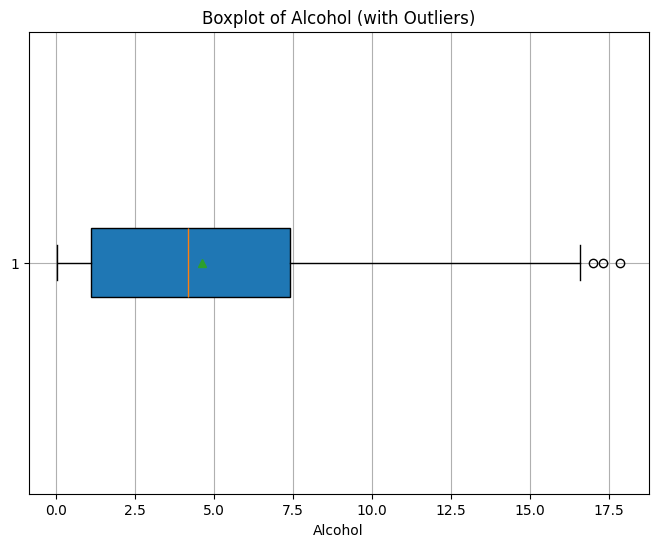

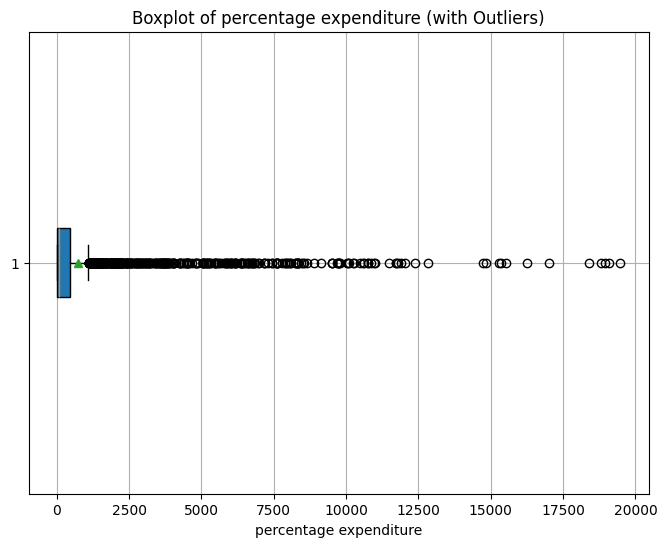

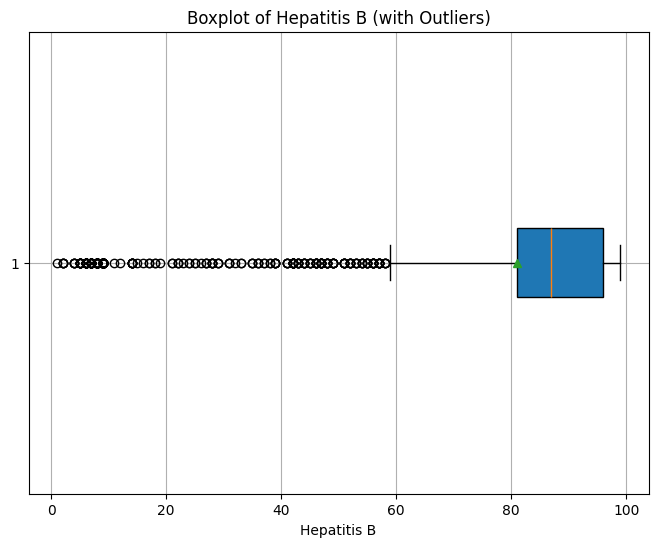

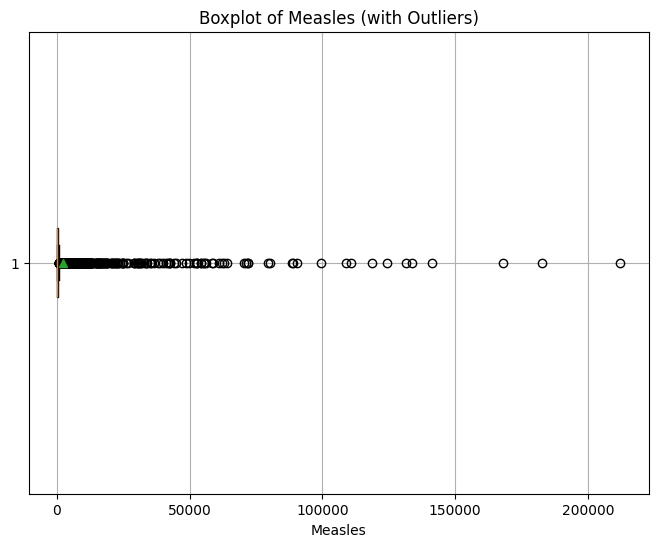

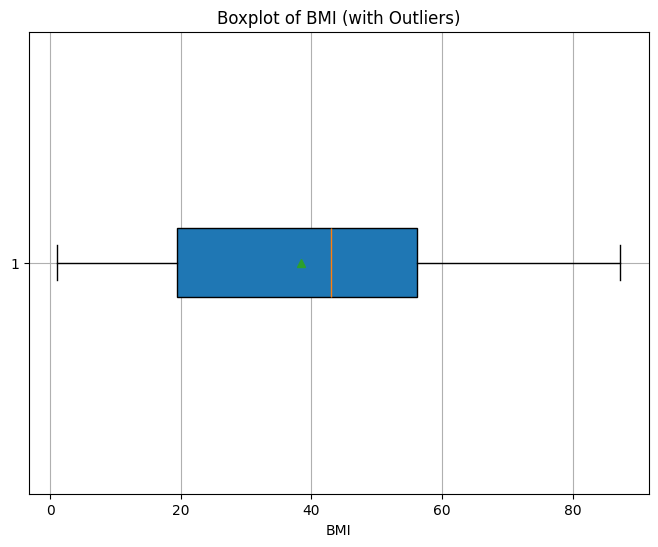

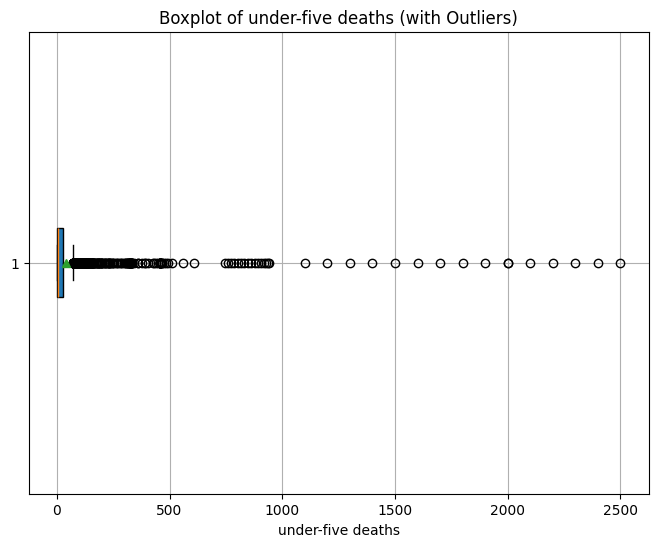

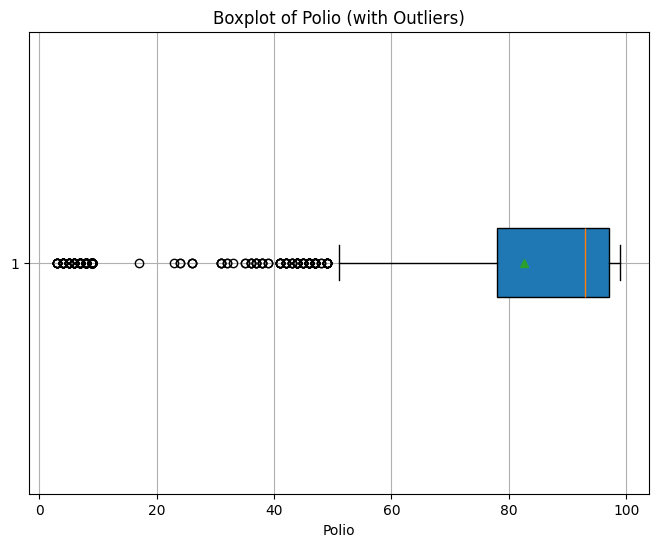

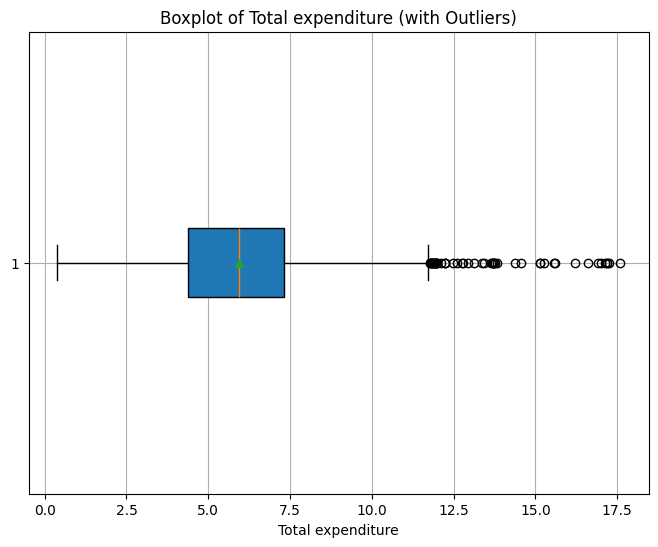

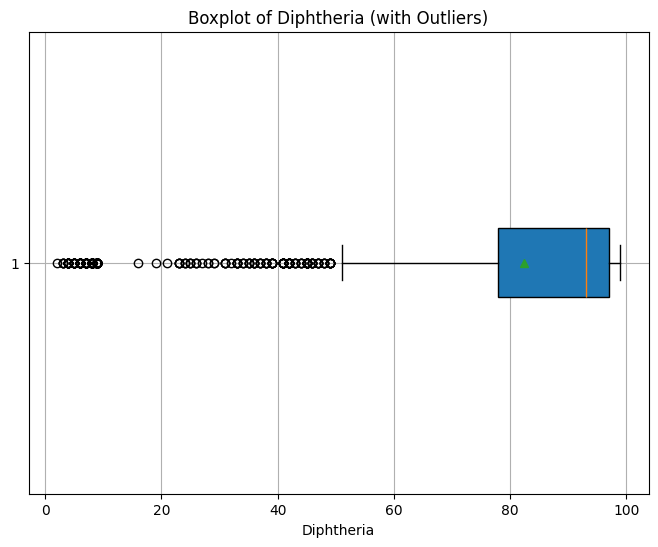

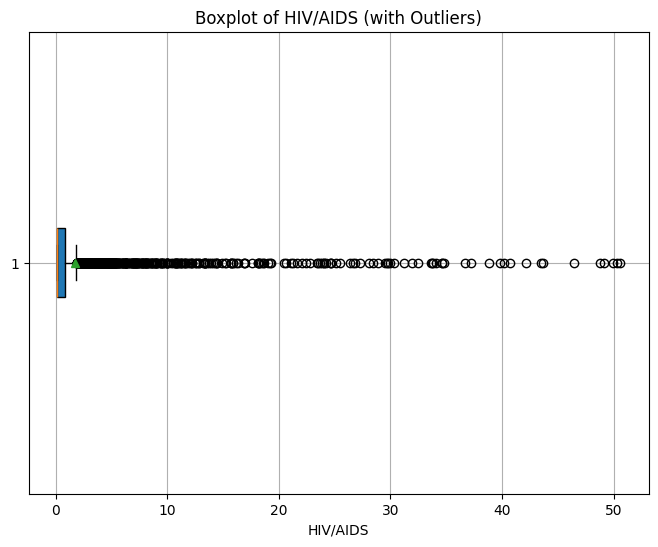

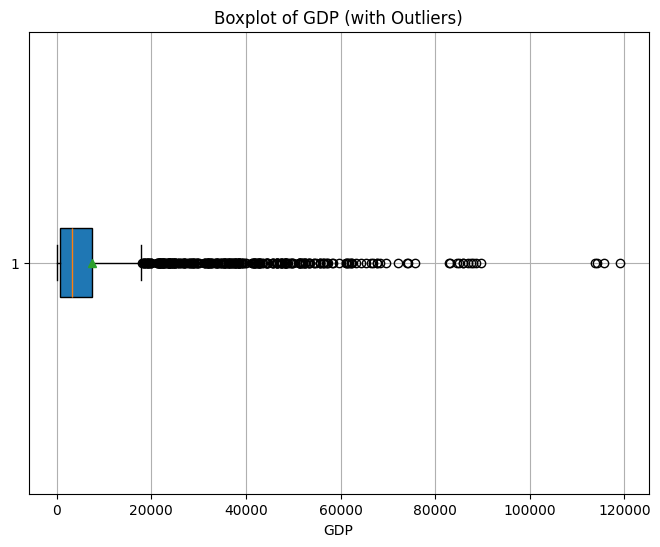

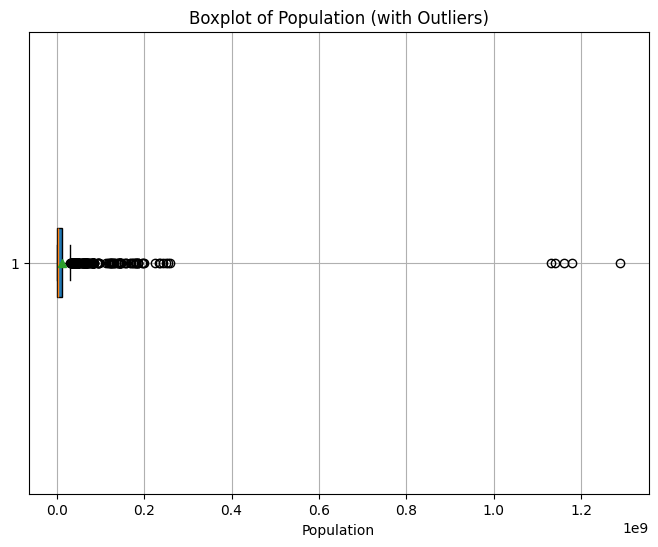

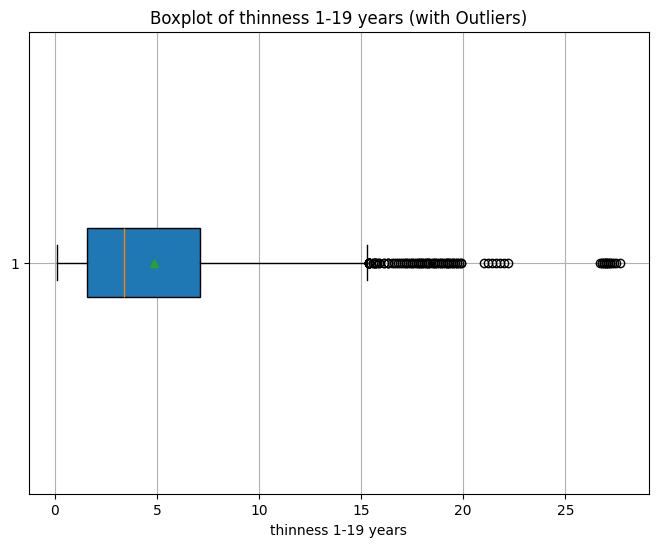

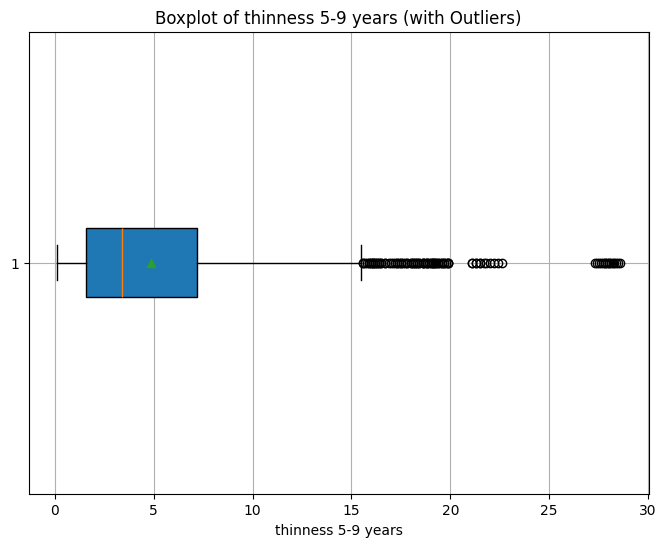

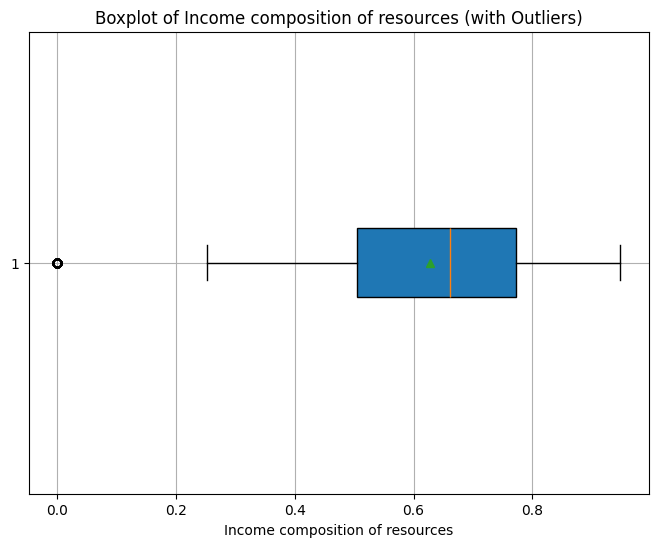

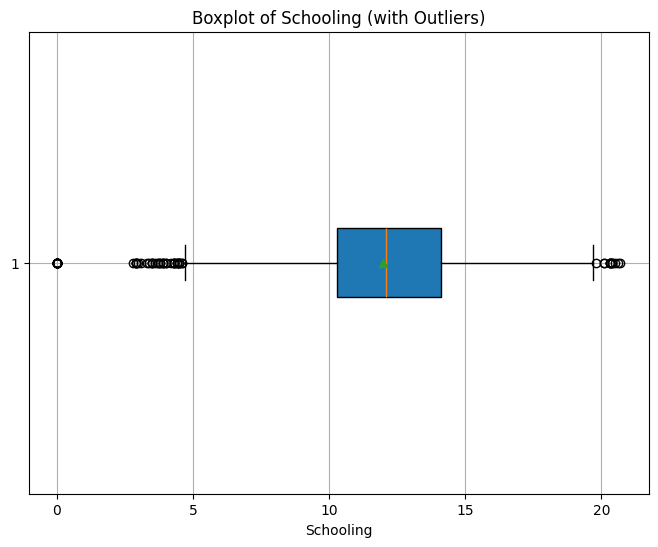

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for all numeric variables
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, showmeans=True)
    plt.title(f'Boxplot of {column} (with Outliers)')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()


Linear Associations (Correlations) with Life Expectancy:
Schooling                          0.715066
Income composition of resources    0.692483
BMI                                0.559255
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Year                               0.169623
Population                        -0.019640
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
thinness 5-9 years                -0.466629
thinness 1-19 years               -0.472162
Status                            -0.481962
HIV/AIDS                          -0.556457
Adult Mortality                   -0.696359
dtype: float64


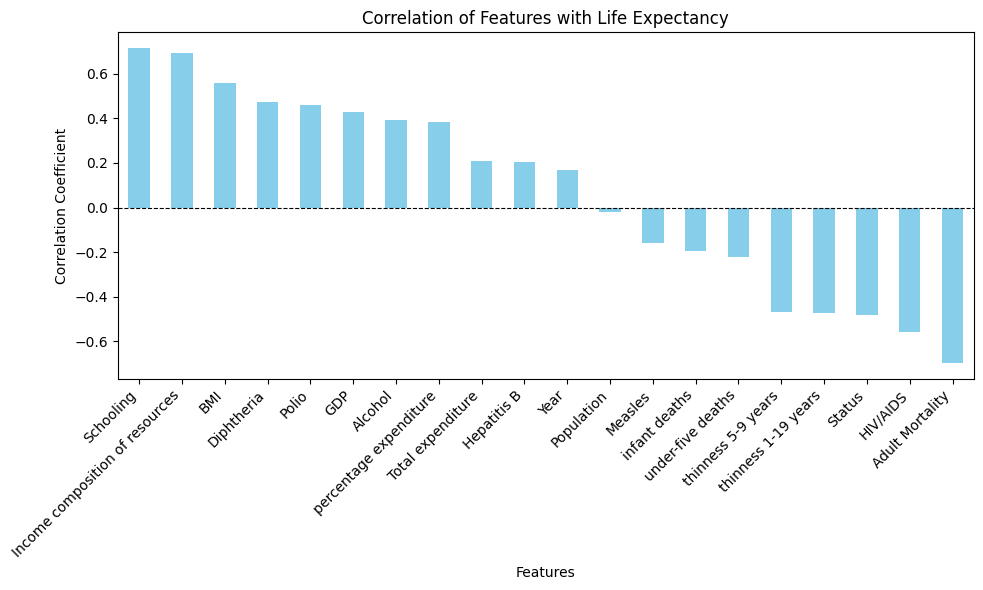

In [24]:
#Linear associations
# Compute correlations


# Select numerical columns, excluding 'Life expectancy'
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Life expectancy'])

# Compute correlations of numerical features with 'Life expectancy'
correlations = numerical_features.corrwith(df['Life expectancy']).sort_values(ascending=False)

# Print correlations
print("Linear Associations (Correlations) with Life Expectancy:")
print(correlations)

# Plot a bar chart of correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Life Expectancy")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


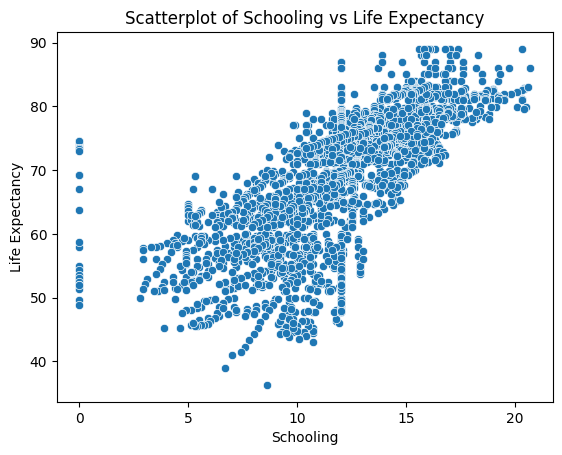

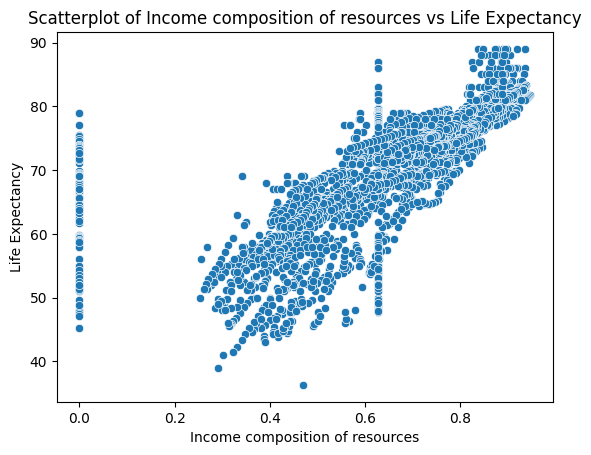

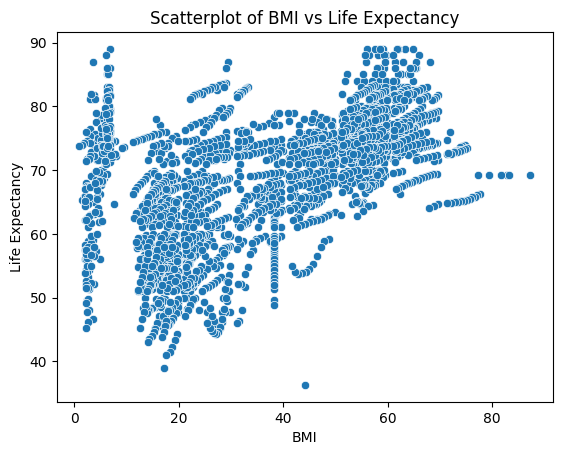

In [25]:
# Strong positive correlations (e.g., > 0.5)
strong_positive_features = correlations[correlations > 0.5].index

# Scatterplots for strong positive correlations
for feature in strong_positive_features:
    sns.scatterplot(x=df[feature], y=df['Life expectancy'])
    plt.title(f"Scatterplot of {feature} vs Life Expectancy")
    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
    plt.show()


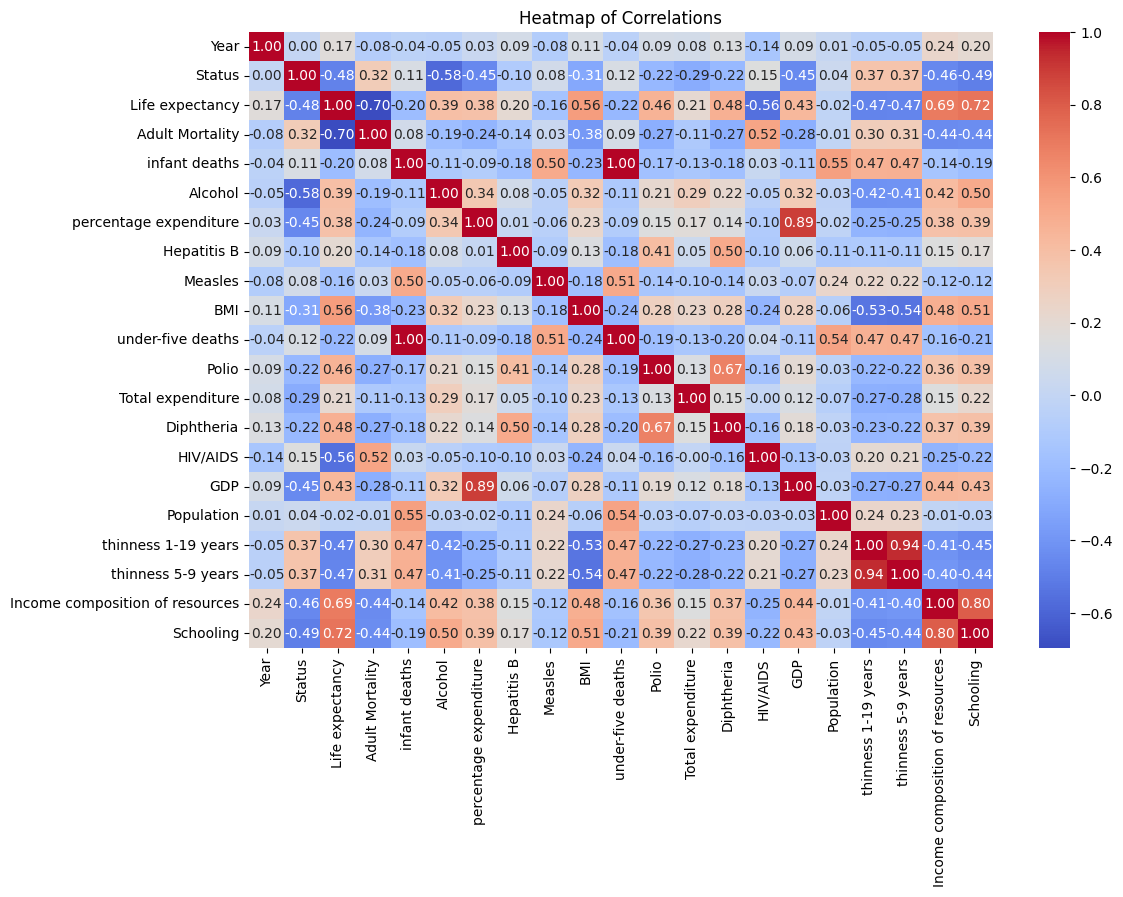

In [26]:
# Add 'Life expectancy' back to the numerical features DataFrame
all_correlations = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(all_correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Correlations")
plt.show()


In [27]:
#Normalisation of data

#Min Max scaling

from sklearn.preprocessing import MinMaxScaler

# Features selected for scaling
features_to_scale = [
    'GDP',
    'Population',
    'BMI',
    'percentage expenditure',
    'Schooling',
    'Income composition of resources',
    'Adult Mortality',
    'HIV/AIDS'
]

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply scaling
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display a sample of the scaled data
print(df[features_to_scale].head())

        GDP  Population       BMI  percentage expenditure  Schooling  \
0  0.004889    0.026152  0.209733                0.003659   0.487923   
1  0.005127    0.000254  0.203940                0.003774   0.483092   
2  0.005287    0.024598  0.198146                0.003759   0.478261   
3  0.005608    0.002866  0.192352                0.004014   0.473430   
4  0.000519    0.002309  0.187717                0.000364   0.458937   

   Income composition of resources  Adult Mortality  HIV/AIDS  
0                         0.505274         0.362881       0.0  
1                         0.502110         0.373961       0.0  
2                         0.495781         0.369806       0.0  
3                         0.488397         0.375346       0.0  
4                         0.478903         0.379501       0.0  


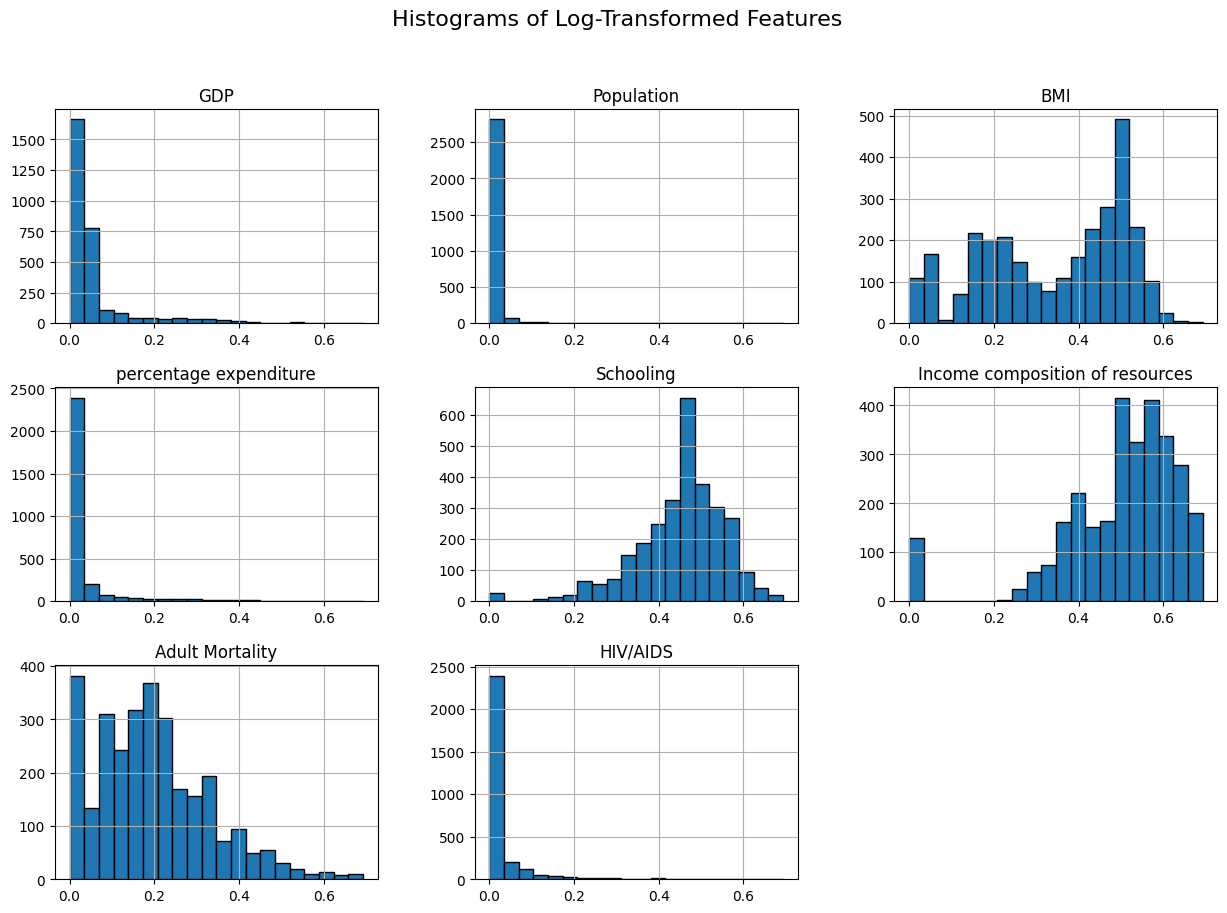

In [28]:
# Apply log transformation to reduce skewness for relevant features
features_to_log_transform = ['GDP', 'Population',   'BMI','percentage expenditure', 'Schooling','Income composition of resources','Adult Mortality', 'HIV/AIDS']
for feature in features_to_log_transform:
    df[feature] = np.log1p(df[feature])  # log1p handles zero values safely

# Plot the histograms of the log-transformed features
df[features_to_log_transform].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Features', fontsize=16)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns (excluding the target variable)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
features = df[numeric_columns].drop(columns=['target_column'], errors='ignore')  # Replace 'target_column' with your target variable

# Standardize the features to ensure uniform scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features_scaled, i) for i in range(features_scaled.shape[1])]

# Display VIF results
print(vif_data)

                            Feature         VIF
0                              Year    1.151309
1                            Status    1.900893
2                   Life expectancy    5.507714
3                   Adult Mortality    1.964653
4                     infant deaths  184.487789
5                           Alcohol    1.863300
6            percentage expenditure    5.003610
7                       Hepatitis B    1.406419
8                           Measles    1.385227
9                               BMI    1.696303
10                under-five deaths  184.035819
11                            Polio    1.975965
12                Total expenditure    1.206220
13                       Diphtheria    2.272904
14                         HIV/AIDS    1.895758
15                              GDP    5.143887
16                       Population    1.488289
17              thinness 1-19 years    8.782087
18               thinness 5-9 years    8.870742
19  Income composition of resources    2

In [ ]:
print(X_train.isnull().sum())  # Ensure no missing values remain
# Identify non-numeric columns in X

# Define the target variable
y = df['Life expectancy']

# Define features (drop target and irrelevant columns)
X = df.drop(columns=['Life expectancy'])  # Adjust columns as needed

# Identify non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_columns)

from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Target Binned                      0
dtype: int64
Non-Numeric Columns: Index([], dtype='object')


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import pandas as pd

# Assuming 'df' is your dataset
# Define the target variable
y = df['Life expectancy']

# Define features (drop target and irrelevant columns)
X = df.drop(columns=['Life expectancy'])

# Handle non-numeric columns
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Define K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric
scoring = make_scorer(mean_squared_error, squared=False)

# Perform Cross-Validation on the train set
cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)

# Print Cross-Validation Results
print("Cross-Validation RMSE Scores:", cv_scores)
print("Mean RMSE:", cv_scores.mean())
print("Standard Deviation RMSE:", cv_scores.std())

# Train the model on the entire train set
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate on the test set
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance on Test Set:")
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Cross-Validation RMSE Scores: [3.79946782 4.49454612 4.00728285 4.31245581 4.05646894]
Mean RMSE: 4.134044308371064
Standard Deviation RMSE: 0.24323652905351112

Linear Regression Performance on Test Set:
RMSE: 3.9035682187350558
R² Score: 0.8241150097020745


In [31]:
coefficients = pd.Series(lr.coef_, index=X_train.columns)
print(coefficients)

Year                                0.012299
Status                             -1.820419
Adult Mortality                   -17.660211
infant deaths                       0.094937
Alcohol                             0.081866
percentage expenditure              3.704206
Hepatitis B                        -0.016847
Measles                            -0.000022
BMI                                 4.757292
under-five deaths                  -0.070709
Polio                               0.027823
Total expenditure                   0.024751
Diphtheria                          0.040896
HIV/AIDS                          -34.767075
GDP                                 4.820073
Population                         -1.038781
thinness 1-19 years                -0.108161
thinness 5-9 years                  0.013152
Income composition of resources     6.419622
Schooling                          20.226909
dtype: float64


In [32]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize LassoCV with Cross-Validation
lasso = LassoCV(cv=5, random_state=42, alphas=[0.01, 0.1, 1.0, 10.0])

# Fit the model on the training set
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the Lasso model
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print("Lasso Regression Performance:")
print("Optimal Alpha:", lasso.alpha_)
print("RMSE (Test Set):", rmse_lasso)
print("R² Score (Test Set):", r2_lasso)

# Print coefficients
coefficients_lasso = pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False)
print("\nLasso Coefficients:")
print(coefficients_lasso)

Lasso Regression Performance:
Optimal Alpha: 0.01
RMSE (Test Set): 3.91037686890478
R² Score (Test Set): 0.8235009132225997

Lasso Coefficients:
Schooling                          19.053910
Income composition of resources     6.511180
GDP                                 4.913044
BMI                                 4.531283
percentage expenditure              2.047078
infant deaths                       0.097350
Alcohol                             0.093340
Diphtheria                          0.042001
Polio                               0.029009
Total expenditure                   0.022069
Year                                0.020125
Population                         -0.000000
thinness 5-9 years                 -0.000000
Measles                            -0.000022
Hepatitis B                        -0.017179
under-five deaths                  -0.072486
thinness 1-19 years                -0.113624
Status                             -1.936866
Adult Mortality                   -17.768298


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.20967057262897, tolerance: 16.707857156490405
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24356.72588350353, tolerance: 16.707857156490405
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16266.656108894433, tolerance: 16.707857156490405
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Convergen

In [33]:
from sklearn.linear_model import RidgeCV

# Initialize RidgeCV with Cross-Validation
ridge = RidgeCV(cv=5, alphas=[0.01, 0.1, 1.0, 10.0])

# Fit the model on the training set
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the Ridge model
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print("\nRidge Regression Performance:")
print("Optimal Alpha:", ridge.alpha_)
print("RMSE (Test Set):", rmse_ridge)
print("R² Score (Test Set):", r2_ridge)

# Print coefficients
coefficients_ridge = pd.Series(ridge.coef_, index=X_train.columns).sort_values(ascending=False)
print("\nRidge Coefficients:")
print(coefficients_ridge)


Ridge Regression Performance:
Optimal Alpha: 0.1
RMSE (Test Set): 3.9042225312923136
R² Score (Test Set): 0.8240560413959231

Ridge Coefficients:
Schooling                          20.029114
Income composition of resources     6.489438
GDP                                 4.808830
BMI                                 4.777123
percentage expenditure              3.701948
infant deaths                       0.095211
Alcohol                             0.082201
Diphtheria                          0.040968
Polio                               0.027912
Total expenditure                   0.024141
Year                                0.013131
thinness 5-9 years                  0.012651
Measles                            -0.000022
Hepatitis B                        -0.016831
under-five deaths                  -0.070911
thinness 1-19 years                -0.108781
Population                         -0.953584
Status                             -1.830621
Adult Mortality                   -17.69565

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
